In [1]:
#-*-coding:utf-8-*-
#仅仅使用pytorch的自动求导autograd
import torch
from torch.autograd import Variable

w=Variable(torch.Tensor([1.0]), requires_grad=True)
b=Variable(torch.Tensor([1.0]), requires_grad=True)

#download training data
x_data=[1,2,3,4,5]
y_data=[2,4,6,8,10]

#our model forward pass
def forward(x):
    #return x*w+b
    return x*w

#loss function
def loss(x,y):
    y_pred=forward(x)
    return (y_pred-y)*(y_pred-y)

epoch_list=[]
w_list=[]
l_list=[]
#training loop
for epoch in range(100):
    for x_val,y_val in zip(x_data,y_data):
        l=loss(x_val,y_val)
        #对loss进行back propagation
        l.backward()
        print("\tgrad:",x_val,y_val,w.grad.data[0])
        #更新参数
        w.data=w.data-0.01*w.grad.data
        #b.data=b.data-0.01*w.grad.data
        
        #manually zero the gradients after updating weights
        w.grad.data.zero_()
    epoch_list.append(epoch)
    w_list.append(float(w.data[0]))
    l_list.append(float(l.data[0]))
    print("progress:",epoch,"loss:",l.data[0],"w:",w.data[0])

	grad: 1 2 -2.0
	grad: 2 4 -7.840000152587891
	grad: 3 6 -16.228801727294922
	grad: 4 8 -23.657981872558594
	grad: 5 10 -25.136608123779297
progress: 0 loss: 6.318490982055664 w: 1.748633861541748
	grad: 1 2 -0.5027322769165039
	grad: 2 4 -1.9707107543945312
	grad: 3 6 -4.079372406005859
	grad: 4 8 -5.946815490722656
	grad: 5 10 -6.318492889404297
progress: 1 loss: 0.39923352003097534 w: 1.9368151426315308
	grad: 1 2 -0.12636971473693848
	grad: 2 4 -0.49536895751953125
	grad: 3 6 -1.0254135131835938
	grad: 4 8 -1.4948234558105469
	grad: 5 10 -1.5882492065429688
progress: 2 loss: 0.025225356221199036 w: 1.9841175079345703
	grad: 1 2 -0.031764984130859375
	grad: 2 4 -0.12451839447021484
	grad: 3 6 -0.2577552795410156
	grad: 4 8 -0.3757476806640625
	grad: 5 10 -0.3992271423339844
progress: 3 loss: 0.001593823079019785 w: 1.9960076808929443
	grad: 1 2 -0.007984638214111328
	grad: 2 4 -0.031299591064453125
	grad: 3 6 -0.06479072570800781
	grad: 4 8 -0.09444808959960938
	grad: 5 10 -0.100345

	grad: 2 4 0.0
	grad: 3 6 0.0
	grad: 4 8 0.0
	grad: 5 10 0.0
progress: 85 loss: 0.0 w: 2.0
	grad: 1 2 0.0
	grad: 2 4 0.0
	grad: 3 6 0.0
	grad: 4 8 0.0
	grad: 5 10 0.0
progress: 86 loss: 0.0 w: 2.0
	grad: 1 2 0.0
	grad: 2 4 0.0
	grad: 3 6 0.0
	grad: 4 8 0.0
	grad: 5 10 0.0
progress: 87 loss: 0.0 w: 2.0
	grad: 1 2 0.0
	grad: 2 4 0.0
	grad: 3 6 0.0
	grad: 4 8 0.0
	grad: 5 10 0.0
progress: 88 loss: 0.0 w: 2.0
	grad: 1 2 0.0
	grad: 2 4 0.0
	grad: 3 6 0.0
	grad: 4 8 0.0
	grad: 5 10 0.0
progress: 89 loss: 0.0 w: 2.0
	grad: 1 2 0.0
	grad: 2 4 0.0
	grad: 3 6 0.0
	grad: 4 8 0.0
	grad: 5 10 0.0
progress: 90 loss: 0.0 w: 2.0
	grad: 1 2 0.0
	grad: 2 4 0.0
	grad: 3 6 0.0
	grad: 4 8 0.0
	grad: 5 10 0.0
progress: 91 loss: 0.0 w: 2.0
	grad: 1 2 0.0
	grad: 2 4 0.0
	grad: 3 6 0.0
	grad: 4 8 0.0
	grad: 5 10 0.0
progress: 92 loss: 0.0 w: 2.0
	grad: 1 2 0.0
	grad: 2 4 0.0
	grad: 3 6 0.0
	grad: 4 8 0.0
	grad: 5 10 0.0
progress: 93 loss: 0.0 w: 2.0
	grad: 1 2 0.0
	grad: 2 4 0.0
	grad: 3 6 0.0
	grad: 4 8 0.0
	

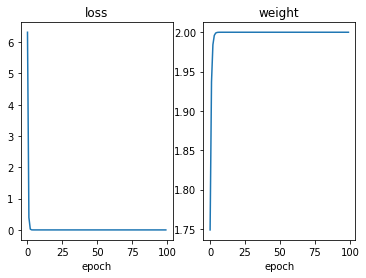

In [2]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(epoch_list,l_list)
plt.xlabel("epoch")
plt.title("loss")

plt.subplot(1,2,2)
plt.plot(epoch_list,w_list)
plt.xlabel("epoch")
plt.title("weight")

plt.show()

In [3]:
#使用pytorch编程风格实现linear regression
'''
1 design your model using class with Variable
2 construct loss and optimizer(select from PyTorch API)
3 training cycl(forward,backward,update)
'''
#data definition (3 data *1 value)
x_data=Variable(torch.Tensor([[1.0],[2.0],[3.0]]))
y_data=Variable(torch.Tensor([[3.0],[6.0],[9.0]]))

#model class in pytorch way
class Module(torch.nn.Module):
    def __init__(self):
        """
        In this constructor we instantiate two nn.Linear module
        """
        super(Module,self).__init__()
        self.linear=torch.nn.Linear(1,1) #one in one out
    
    def forward(self,x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data.We can use modules defined in the constructor as 
        well as arbitrary operators on Variables.
        """
        y_pred=self.linear(x)
        return y_pred

#our model
model=Module()

#Construct our loss function and an Optimizer. The call to model.parameters()
#in the SGD constructor will contain the learnable parameters of the two
#nn.Linear modules which are members of the model.

criterion=torch.nn.MSELoss(size_average=False)
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

#training : forward loss backward step
for epoch in range(500):
    #forward pass: compute predicted y by passing x to the model
    y_pred= model (x_data)
    
    #compute and print loss
    loss=criterion(y_pred,y_data)
    print(epoch,loss.data[0])
    
    #Zero gradients, perform a backward pass , and update the weights.
    optimizer.zero_grad()
    loss.backward()
    #update the paremeters
    optimizer.step()

#after training
hour_var=Variable(torch.Tensor([[4.0]]))
print("predict (after training)",4,model.forward(hour_var).data[0][0])
    

0 122.08110046386719
1 54.34931945800781
2 24.19702911376953
3 10.774045944213867
4 4.798489570617676
5 2.138309955596924
6 0.9540427923202515
7 0.42680901288986206
8 0.19206970930099487
9 0.08754134178161621
10 0.04097852110862732
11 0.020221540704369545
12 0.01095248106867075
13 0.006798129994422197
14 0.0049211410805583
15 0.004058282822370529
16 0.003647265024483204
17 0.003437880426645279
18 0.003318646689876914
19 0.003239793237298727
20 0.003179381135851145
21 0.0031275656074285507
22 0.0030798616353422403
23 0.0030343930702656507
24 0.0029902211390435696
25 0.0029470068402588367
26 0.0029045504052191973
27 0.0028627358842641115
28 0.00282160472124815
29 0.0027810228057205677
30 0.002741053933277726
31 0.002701665973290801
32 0.0026628663763403893
33 0.002624556655064225
34 0.002586837625131011
35 0.002549688331782818
36 0.0025130058638751507
37 0.002476939233019948
38 0.002441331511363387
39 0.0024062327574938536
40 0.0023716455325484276
41 0.0023375956807285547
42 0.0023039760

In [4]:
#image classifier example
import torchvision
import torchvision.transforms as transforms

In [5]:
#the output of torchvision datasets are PILImage images of range [0,1]
#We transform them to Tensor of normalized range[-1,1]

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [6]:
import matplotlib.pyplot as plt
import numpy as np

#funcitons to show an image
def imshow(img):
    img=img/2+0.5 #unnormalize
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    
#get some random training images
dataiter=iter(trainloader)
images,labels=dataiter.next()

#show images
imshow(torchvision.utils.make_grid(images))
#print labels
print(' '.join('%5s' %classes[labels[j]] for j in range(4)))

  cat truck horse   cat


In [7]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1=nn.Conv2d(3,6,5)
        self.pool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(6,16,5)
        self.fc1=nn.Linear(16 * 5 * 5,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
    
    def forward(self,x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=x.view(-1,16 * 5 * 5)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x

net=Net()

        

In [8]:
import torch.optim as optim

criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.01,momentum=0.9)

In [9]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.088
[1,  4000] loss: 1.940
[1,  6000] loss: 1.939
[1,  8000] loss: 1.933
[1, 10000] loss: 1.945
[1, 12000] loss: 1.962
[2,  2000] loss: 1.933
[2,  4000] loss: 1.919
[2,  6000] loss: 1.972
[2,  8000] loss: 1.969
[2, 10000] loss: 1.981
[2, 12000] loss: 1.968
Finished Training


In [10]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

GroundTruth:    cat  ship  ship plane


In [11]:
outputs = net(Variable(images))

In [12]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


In [13]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 26 %


In [14]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane :  9 %
Accuracy of   car : 13 %
Accuracy of  bird :  4 %
Accuracy of   cat : 17 %
Accuracy of  deer : 12 %
Accuracy of   dog : 17 %
Accuracy of  frog : 39 %
Accuracy of horse : 43 %
Accuracy of  ship : 56 %
Accuracy of truck : 48 %


In [15]:
net.cuda()

AssertionError: Torch not compiled with CUDA enabled